## A review of basic concepts in the field of Data Visualization

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [5]:
fString = open("iris.data", "r")
fFloat = open("iris.csv", "w")

for line in fString:
    line = line.replace("Iris-setosa", "1")
    line = line.replace("Iris-versicolor", "2")
    line = line.replace("Iris-virginica", "3")
    fFloat.write(line)

fString.close()
fFloat.close()

fFloat = open("iris.csv", "r")
dataset = np.loadtxt(fFloat, delimiter=",")
fFloat.close()

## Common 2d visualization with matplotlib

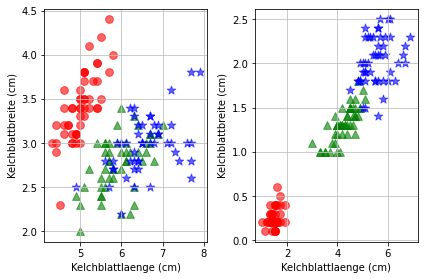

In [11]:
fig = plt.figure(1)

# Subplot syntax rows, columns, number
ax = fig.add_subplot(1,2,1)
ax.scatter(dataset[0:50,0], dataset[0:50,1], c='red', s=60, alpha=0.6)
ax.scatter(dataset[50:100,0], dataset[50:100,1], c='green', marker='^', s=60, alpha=0.6)
ax.scatter(dataset[100:150,0], dataset[100:150,1], c='blue', marker='*', s=80, alpha=0.6)
ax.set_xlabel('Kelchblattlaenge (cm)')
ax.set_ylabel('Kelchblattbreite (cm)')
ax.grid(True, linestyle='-', color='0.75')

ax = fig.add_subplot(1,2,2)
ax.scatter(dataset[0:50,2], dataset[0:50,3], c='red', s=60, alpha=0.6)
ax.scatter(dataset[50:100,2], dataset[50:100,3], c='green', marker='^', s=60, alpha=0.6)
ax.scatter(dataset[100:150,2], dataset[100:150,3], c='blue', marker='*', s=80, alpha=0.6)
ax.set_xlabel('Kelchblattlaenge (cm)')
ax.set_ylabel('Kelchblattbreite (cm)')
ax.grid(True, linestyle='-', color='0.75')

plt.tight_layout()
plt.show(block=False)

## 3d Visualization

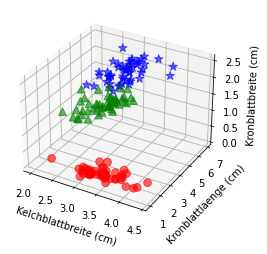

In [13]:
fig = plt.figure(2)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(dataset[0:50,1], dataset[0:50,2], dataset[0:50,3], c='red', s=60, alpha=0.6)
ax.scatter(dataset[50:100,1], dataset[50:100,2], dataset[50:100,3], c='green', marker='^', s=60, alpha=0.6)
ax.scatter(dataset[100:150,1], dataset[100:150,2], dataset[100:150,3], c='blue', marker='*', s=80, alpha=0.6)
ax.set_xlabel('Kelchblattbreite (cm)')
ax.set_ylabel('Kronblattlaenge (cm)')
ax.set_zlabel('Kronblattbreite (cm)')
plt.show()

(375, 375, 4)


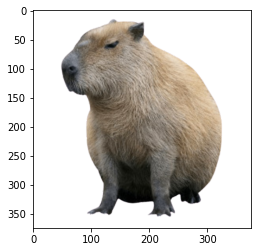

In [14]:
import time
import matplotlib.image as mpimg

plt.figure(1)
capy=mpimg.imread('capybara.png')
plt.imshow(capy)
print(capy.shape)

Benoetigte Zeit(s): 0.10619473457336426


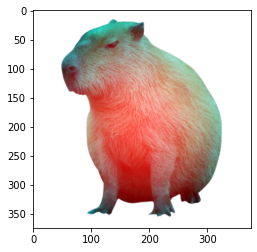

In [19]:
newCapy = np.copy(capy)
t = time.time()
for x in range(0,375):
    for y in range(0,375):
        newCapy[x,y,0] = max(1 - (x/187 - 1)**2 - (y/187 - 1)**2, 0)
elapsed = time.time()-t
print("Benoetigte Zeit(s): " + str(elapsed))
plt.figure(3)
plt.imshow(newCapy)

Benoetigte Zeit(s): 0.006005287170410156


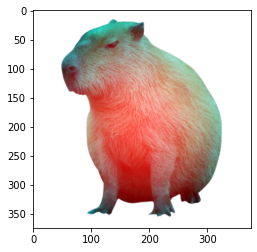

In [21]:
newCapy2 = np.copy(capy)
t = time.time()
xv, yv = np.meshgrid(np.arange(0,375), np.arange(0,375))
newCapy2[:,:,0] = np.maximum(1- (xv/187 - 1)**2 - (yv/187 - 1)**2, 0)
del(xv, yv)
elapsed = time.time() - t
print("Benoetigte Zeit(s): " + str(elapsed))
plt.figure(4)
plt.imshow(newCapy2)

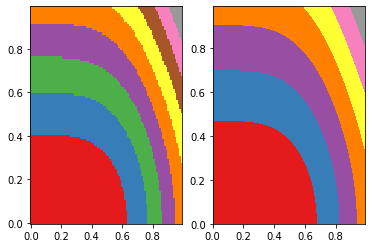

In [23]:
XX, YY = np.mgrid[0:1:0.01, 0:1:0.01]
X = np.array([XX.ravel(), YY.ravel()]).T # Flattens 2d array into contiguous 1D
Z = np.sin(XX**2)**2 + np.log(1 + YY**2)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.pcolormesh(XX, YY, Z, cmap=plt.cm.Set1)
ax = fig.add_subplot(1,2,2)
ax.contourf(XX, YY, Z, cmap=plt.cm.Set1)